# 📘 ETAPA 3 — Modelo Baseline (Versão Melhorada)
Melhorias e ajustes adicionais:
- Gráfico Valores Reais vs Previstos
- Top 3 features mais importantes
- Organização mais clara para apresentação


## 1. Importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
import os


## 2. Carregar Dataset

In [ ]:
df = pd.read_csv('dataset_preprocessado.csv')
print('Shape:', df.shape)
df.head()

Shape: (2510, 44)


,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,...,payment_methods_CREDIT CARD,payment_methods_Credit Card,payment_methods_DEBIT CARD,payment_methods_Debit Card,payment_methods_PAYPAL,payment_methods_PayPal,marketing_eficiencia,traffic_conversion,price_rating_ratio,customer_value
0,SALE00022,0.367775,0.050159,-0.551488,-1.236772,25,90,-0.236852,1.071484,0.417677,...,False,True,False,False,False,False,0.512510,-0.027662,1.000341,0.338404
1,SALE00633,0.786217,0.261733,1.808991,1.221104,10,37,-0.393032,1.664115,-0.043506,...,False,False,False,False,False,True,0.498685,0.473472,-0.176953,0.334355
2,SALE01551,-0.025199,-0.536197,0.245691,-0.800697,15,499,-0.670906,0.482534,-0.043506,...,False,False,False,False,False,True,-0.281327,-0.131739,-3.366262,-0.184979
3,SALE00391,1.087066,1.262180,-0.789606,-0.126763,20,128,-1.111085,1.067803,0.612966,...,False,False,False,False,False,False,0.310465,-0.996626,-1.272375,0.313357
4,SALE00375,-1.939339,0.549868,-1.628197,1.379677,0,429,0.182555,1.579453,0.324539,...,False,True,False,False,False,False,2.012094,-0.895294,0.076714,-0.732728


## 3. Preparar Dados (X e y)

In [ ]:
# Remover colunas irrelevantes
if 'sale_id' in df.columns:
    df = df.drop(columns=['sale_id'])

# Selecionar variável target
y = df['monthly_sales']
X = df.drop(columns=['monthly_sales'])

# Garantir que tudo é numérico
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

print('X shape:', X.shape)
print('y shape:', y.shape)


X shape: (2510, 42)
y shape: (2510,)


## 4. Divisão 60/20/20

In [ ]:
# 60% treino, 40% temporário
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)

# 20% val, 20% teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)


Treino: (1506, 42)
Validação: (502, 42)
Teste: (502, 42)


## 5. Treinar Modelo Linear

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_val = modelo.predict(X_val)

print("Modelo treinado!")

Modelo treinado!


## 6. Métricas de Desempenho

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print("=== Métricas Treino ===")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R²:", r2_train)
print("=== Métricas Validação ===")
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("MAE:", mae_val)
print("R²:", r2_val)


=== Métricas Treino ===
MSE: 0.5264784641207716
RMSE: 0.725588357211423
MAE: 0.5106269277055298
R²: 0.4325915667674415
=== Métricas Validação ===
MSE: 0.6427844114127097
RMSE: 0.8017383684299446
MAE: 0.532617184547316
R²: 0.36349073741790294


## 7. Gráfico: Valores Reais vs Previstos (VAL)

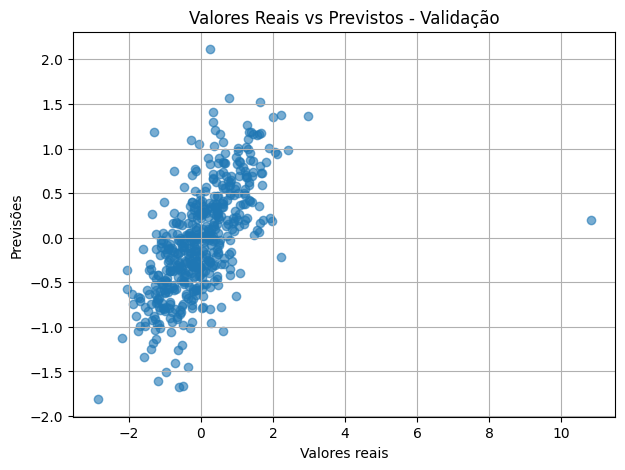

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_val, y_pred_val, alpha=0.6)
plt.xlabel("Valores reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs Previstos - Validação")
plt.grid(True)
plt.show()


## 8. Gráfico de Resíduos

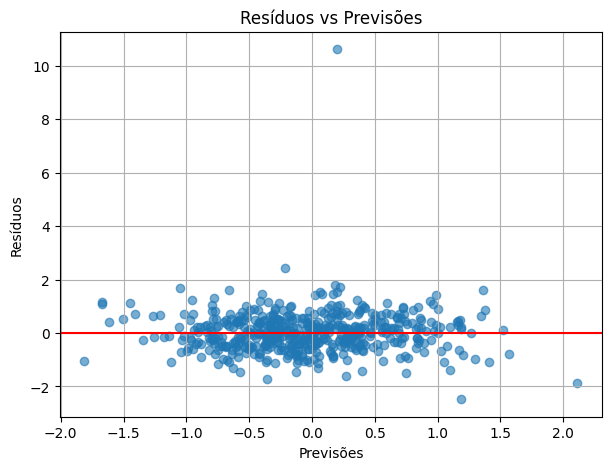

In [ ]:
residuos = y_val - y_pred_val

plt.figure(figsize=(7,5))
plt.scatter(y_pred_val, residuos, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.grid(True)
plt.show()


## 9. Top 3 Features Mais Importantes

In [ ]:
coeficientes = pd.Series(modelo.coef_, index=X_train.columns)
top3 = coeficientes.abs().sort_values(ascending=False).head(3)
print("Top 3 features mais importantes:")
print(top3)


Top 3 features mais importantes:
payment_methods_PAYPAL            0.920284
payment_methods_  Credit Card     0.826617
payment_methods_BANK TRANSFER     0.744566
dtype: float64


## 10. Salvar Modelo

In [ ]:
os.makedirs('models', exist_ok=True)
joblib.dump(modelo, 'models/modelo_baseline_melhorado.pkl')
print("Modelo salvo em models/modelo_baseline_melhorado.pkl")


Modelo salvo em models/modelo_baseline_melhorado.pkl
